# Test de segmentation des cartes selon le profil du répondant

**Important** nécessite le fichier des données personnelles qui n'est _pas_ versionné dans le dépôt.

In [1]:
from IPython.display import display

import seaborn as sns

from anonymizer import get_data, PERSONAL_DATA_FILE


# les data
df = get_data(PERSONAL_DATA_FILE, drop=False) 
# ajout des colonnes jeunes/vieux
df["inf_25_ans"] = df["age"] < 25
df["inf_35_ans"] = df["age"] < 35
df["depend_mine"] = df["travail_mine"] | df["famille_mine"]

In [2]:
df.columns

Index(['date', 'commune_enquete', 'travail_mine', 'duree_travail_mine',
       'famille_mine', 'habitant_nc', 'duree_presence_nc', 'commune_residence',
       'commune_miniere', 'duree_residence', 'habite_ailleurs_nc', 'age',
       'genre', 'age_interval', 'duree_residence_interval',
       'duree_presence_nc_interval', 'duree_travail_mine_interval',
       'inf_25_ans', 'inf_35_ans', 'depend_mine'],
      dtype='object')

In [3]:
# df.groupby(["travail_mine", "famille_mine"]).count()
df.value_counts(subset=["travail_mine", "famille_mine"], sort = False)

travail_mine  famille_mine
False         False           115
              True            232
True          False            11
              True             46
dtype: int64

In [4]:
df.value_counts(subset=["depend_mine", "commune_miniere", "inf_35_ans"], sort = False)

depend_mine  commune_miniere  inf_35_ans
False        Minière          False          9
                              True          28
             Mixte            False          4
                              True          41
             Non minière      False          5
                              True          28
True         Minière          False         36
                              True          74
             Mixte            False         10
                              True          60
             Non minière      False         19
                              True          89
dtype: int64

In [5]:
# df.groupby(["age_interval"]).count()
df.value_counts(subset=["age_interval"], sort = False)

age_interval
[10.0, 20.0)    158
[20.0, 30.0)    152
[30.0, 40.0)     20
[40.0, 50.0)     23
[50.0, 60.0)     34
[60.0, 70.0)     10
[70.0, 80.0)      4
[80.0, 90.0)      2
dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

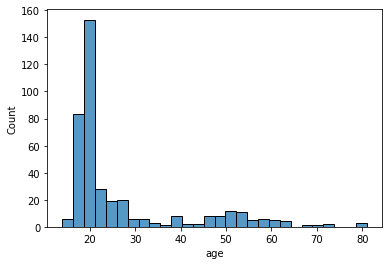

In [6]:
sns.histplot(df["age"])

<AxesSubplot:xlabel='duree_residence', ylabel='Count'>

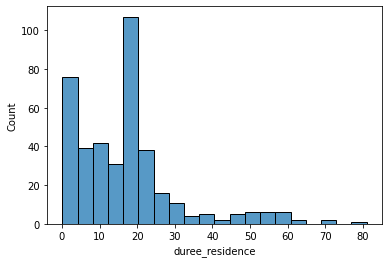

In [7]:
sns.histplot(df["duree_residence"])

<AxesSubplot:xlabel='duree_travail_mine', ylabel='Count'>

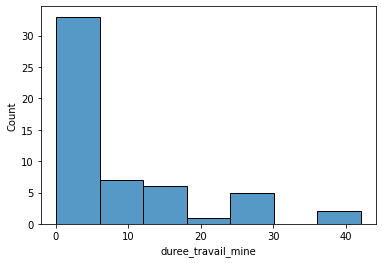

In [15]:
sns.histplot(df["duree_travail_mine"])

<AxesSubplot:xlabel='duree_presence_nc', ylabel='Count'>

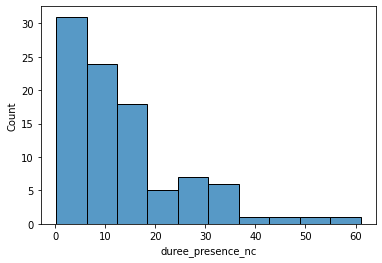

In [16]:
sns.histplot(df["duree_presence_nc"])

<AxesSubplot:xlabel='age', ylabel='duree_presence_nc'>

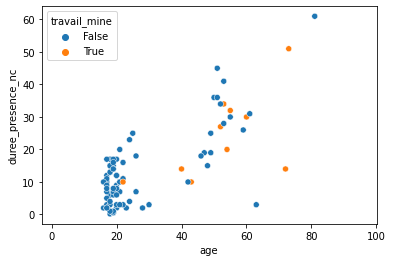

In [21]:
import matplotlib.pyplot as plt
plt.axis('equal')
sns.scatterplot(data=df, x="age", y="duree_presence_nc", hue="travail_mine")

In [69]:
# df2 = df.groupby(["age_interval", "genre"]).count()
df2 = df[df["genre"] != "Autre"].value_counts(subset=["age_interval", "genre"], sort = False).to_frame("count").reset_index()
df2


,age_interval,genre,count
0,"[10.0, 20.0)",Femme,98
1,"[10.0, 20.0)",Homme,57
2,"[20.0, 30.0)",Femme,84
3,"[20.0, 30.0)",Homme,67
4,"[30.0, 40.0)",Femme,10
5,"[30.0, 40.0)",Homme,10
6,"[40.0, 50.0)",Femme,17
7,"[40.0, 50.0)",Homme,6
8,"[50.0, 60.0)",Femme,13
9,"[50.0, 60.0)",Homme,21


<AxesSubplot:xlabel='count', ylabel='age_interval'>

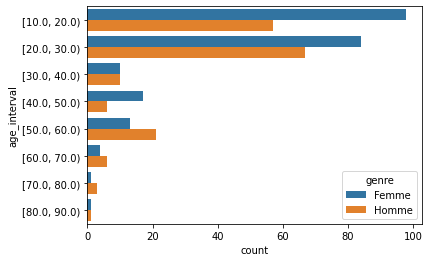

In [68]:
sns.barplot(data=df2, x='count',y='age_interval', hue='genre',orient='horizontal',  dodge=True)

In [8]:
partition = { True : list(df[df.travail_mine].index), False: list(df[~ df.travail_mine].index) }
print(partition)
for key, vals in partition.items():
    print(key, len(vals))

{True: [5, 8, 17, 19, 20, 23, 26, 27, 29, 30, 31, 32, 33, 34, 37, 38, 39, 42, 46, 47, 53, 55, 57, 58, 61, 74, 103, 106, 150, 184, 191, 230, 246, 256, 283, 289, 292, 294, 301, 302, 333, 336, 356, 357, 369, 371, 372, 374, 385, 389, 390, 391, 392, 393, 399, 401, 408], False: [1, 2, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 21, 22, 24, 25, 28, 35, 36, 41, 43, 44, 48, 49, 50, 51, 52, 54, 56, 59, 60, 62, 63, 65, 67, 68, 69, 70, 71, 72, 73, 76, 77, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188, 189, 190, 192, 193, 194, 195, 196, 197, 198, 199, 200, 

In [9]:
from cog_maps import CogMaps, THESAURUS_FILENAME, WEIGHTS_MAP_FILENAME, CM_LA_MINE_FILENAME

thesaurus = CogMaps.load_thesaurus_map(THESAURUS_FILENAME)
weights = CogMaps.load_weights(WEIGHTS_MAP_FILENAME)

mine_map = CogMaps(CM_LA_MINE_FILENAME, predicate=lambda i : i in partition[True])
print(len(mine_map))

non_mine_map = CogMaps(CM_LA_MINE_FILENAME, predicate=lambda i : i in partition[False])
print(len(non_mine_map))

57
347


In [10]:
display(weights.keys())

dict_keys(['arithmetique', 'inverse', 'pos_1', 'pos_3', 'pos_6', 'pos_3_arith', 'pos_6_arith', 'exponentielle'])

In [11]:
all_mine_maps, _ = mine_map.apply_many(thesaurus, with_unknown=False)
all_non_mine_maps, _ = non_mine_map.apply_many(thesaurus, with_unknown=False)
print(all_mine_maps.keys())
print(all_non_mine_maps.keys())

CHOSEN_WEIGHTS = "inverse"
for name, a_map in all_mine_maps.items():
    a_map.weights = weights[CHOSEN_WEIGHTS]
for name, a_map in all_non_mine_maps.items():
    a_map.weights = weights[CHOSEN_WEIGHTS]


dict_keys(['base', 'concept', 'mother', 'gd_mother'])
dict_keys(['base', 'concept', 'mother', 'gd_mother'])


In [12]:
from operator import itemgetter 

CHOSEN_LEVEL = "mother"
mine_mother = all_mine_maps[CHOSEN_LEVEL]
non_mine_mother = all_non_mine_maps[CHOSEN_LEVEL]

mine_frequence = [(w, round(100*n/len(mine_mother))) for w,n in mine_mother.occurrences.items()]
non_mine_frequence = [(w, round(100*n/len(non_mine_mother))) for w,n in non_mine_mother.occurrences.items()]


display("Pour ceux qui travaillent à la mine (en % de citation pondéré par la position)")
display(sorted(mine_frequence, key=itemgetter(1), reverse = True)[:10])
display("Pour ceux qui NE travaillent PAS à la mine (en % de citation pondéré par la position)")
display(sorted(non_mine_frequence, key=itemgetter(1), reverse = True)[:10])

'Pour ceux qui travaillent à la mine (en % de citation pondéré par la position)'

[('nickel', 30),
 ('emploi', 21),
 ('économie du pays', 18),
 ('impact environnemental', 18),
 ('pollution', 17),
 ('revenu', 15),
 ('richesse', 9),
 ('développement', 9),
 ('engin', 9),
 ('terre', 8)]

'Pour ceux qui NE travaillent PAS à la mine (en % de citation pondéré par la position)'

[('nickel', 29),
 ('impact environnemental', 20),
 ('emploi', 17),
 ('minerai', 17),
 ('pollution', 14),
 ('économie du pays', 12),
 ('exploitation', 12),
 ('usine', 11),
 ('engin', 9),
 ('terre', 9)]

In [13]:
from functools import partial
from graphize import cog_map_to_graph
from draw_graphviz import draw_graphviz
import networkx as nx

draw = partial(
    draw_graphviz,
    algorithm="sfdp",
    sep=0.01,
    fontsize=12,  # "proportional",
    node_color="weight",
    min_edge_penwidths=2,
    max_edge_penwidths=12,
    min_node_size=0.02,
    max_node_size=1,
)



In [14]:
a_mine_graph = cog_map_to_graph(all_mine_maps["mother"], threshold=2.0)
draw(a_mine_graph, "mine_test.svg")

a_non_mine_graph = cog_map_to_graph(all_non_mine_maps["mother"], threshold=2.0)
draw(a_non_mine_graph, "non_mine_test.svg")

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\pygraphviz\agraph.py:1390: RuntimeWarning: Error: remove_overlap: Graphviz not built with triangulation library

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
